In [5]:
import pywt
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [3]:
def w2d(img,mode='haar',level=1):
    imarray=img
    imarray=cv2.cvtColor(imarray,cv2.COLOR_RGB2GRAY)

    imarray=np.float32(imarray)
    imarray/=255

    coeff=pywt.wavedec2(imarray,mode,level=level)
    coeff_h=list(coeff)
    coeff_h[0]*=0

    imarray_h=pywt.waverec2(coeff_h,mode)
    imarray_h*=255
    imarray_h=np.uint8(imarray_h)

    return imarray_h


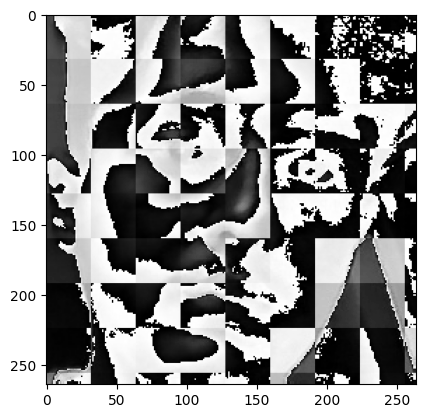

In [9]:
img = cv2.imread('D:/vs/jupyter/Source_files/Family_classifier/data/croppedaaditya/aaditya67.png')
img = w2d(img,'db1',5)
plt.imshow(img,cmap='gray')

In [10]:
x=[]
y=[]

In [11]:
import os

In [18]:
names=['aaditya','akshita','mummy','papa']

In [20]:
count=0
for i in os.scandir('D:/vs/jupyter/Source_files/Family_classifier/data/cropped'):
    print(i.path)
    for j in os.scandir(i.path):
        img=cv2.imread(j.path)
        if img is None:
            continue
        scalled=cv2.resize(img,(32,32))
        img_h=w2d(img,'db1',5)
        scalled_img_h=cv2.resize(img_h,(32,32))
        cmb_img=np.vstack((scalled.reshape(32*32*3,1),scalled_img_h.reshape(32*32,1)))
        x.append(cmb_img)
        y.append(names[count])
    count+=1



D:/vs/jupyter/Source_files/Family_classifier/data/cropped\croppedaaditya
D:/vs/jupyter/Source_files/Family_classifier/data/cropped\croppedakshita
D:/vs/jupyter/Source_files/Family_classifier/data/cropped\croppedmummy
D:/vs/jupyter/Source_files/Family_classifier/data/cropped\croppedpapa


In [27]:
print(len(x))
print(len(y))

380
380


In [28]:
len(x[0])

4096

In [29]:
x=np.array(x).reshape(len(x),4096).astype(float)
x.shape

(380, 4096)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [35]:
print(x_train.shape,x_test.shape)

print(len(y_train),len(y_test))

(266, 4096) (114, 4096)
266 114


In [36]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [39]:
pipe=Pipeline([('scaler',StandardScaler()),('svc',SVC(kernel='rbf',C=10))])

In [40]:
pipe.fit(x_train,y_train)
pipe.score(x_test,y_test)

0.9736842105263158

hyper parameter testing

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [55]:
model_para = {
    'svm': {
        'model': SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [46]:
from sklearn.pipeline import make_pipeline

In [56]:
scores = []
best = {}
import pandas as pd

for algo, mps in model_para.items():
    pipe = make_pipeline(StandardScaler(), mps['model'])
    clf =  GridSearchCV(pipe, mps['params'], cv=5, return_train_score=False)
    clf.fit(x_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.988679,"{'svc__C': 1, 'svc__kernel': 'rbf'}"
1,random_forest,0.973585,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.988679,{'logisticregression__C': 1}


In [57]:
best['svm'].score(x_test,y_test)

0.9912280701754386

In [58]:
best['random_forest'].score(x_test,y_test)

0.9649122807017544

In [59]:
best['logistic_regression'].score(x_test,y_test)

0.9736842105263158

In [60]:
best_clf = best['svm']

In [61]:
import joblib 
# Save the model as a pickle in a file 
joblib.dump(best_clf, 'model.pkl') 

['model.pkl']